In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier

from my_lib.plotting import plot_probability_distributions, plot_learning_curve, plot_validation_curve

In [2]:
data = pd.read_csv('data/titanic_newAge_withEncoded.csv')

In [3]:
X = data.drop(columns=['Unnamed: 0', 'PassengerId', 'Survived'])
y = data['Survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [13]:
clf = RandomForestClassifier(random_state=1, max_depth=5, criterion='entropy')

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=1)

In [15]:
test_score = clf.score(X_test, y_test)
print('Score: {}'.format(test_score))

Score: 0.8301282051282052


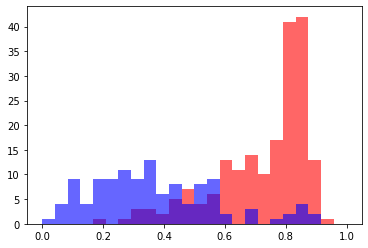

In [16]:
plot_probability_distributions(clf, X_test, y_test)

In [17]:
train_sizes, train_scores, test_scores = learning_curve(
    clf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1, 10),
    cv=5
)

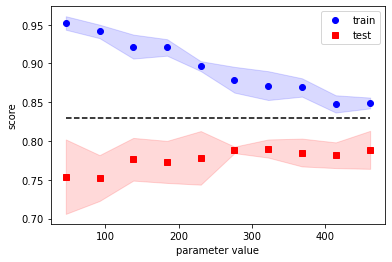

In [18]:
plot_learning_curve(train_scores, test_scores, train_sizes, expected_score=test_score, stat_error=False)

## Validation Curve

In [11]:
param_range = range(2, 10)
train_scores, test_scores = validation_curve(
    estimator=clf, 
    X=X_train, 
    y=y_train, 
    param_name='max_depth', 
    param_range=param_range,
    cv=5
)

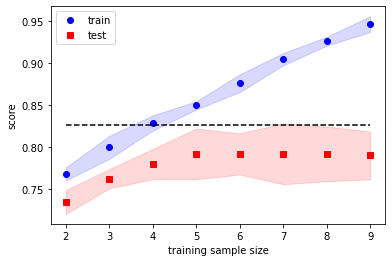

In [12]:
plot_validation_curve(train_scores, test_scores, param_range, expected_score=test_score, stat_error=False)